<a href="https://colab.research.google.com/github/DeepuJose24/DJKeekarikattu/blob/main/Assignment_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick',labelsize=12)


In [7]:
data= pd.read_csv('/content/mnist_784.csv.zip')
data.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [8]:
data.shape

(70000, 785)

In [10]:
def sort_by_target(mnist):
  recorder_train=np.array(sorted([(target,i)for i, target in enumerate(mnist.target[:60000])]))[:,1]
  recorder_test=np.array(sorted([(target,i)for i, target in enumerate(mnist.target[60000:])]))[:,1]
  mnist.data[:60000]=mnist.data[recorder_train]
  mnist.target[:60000]=mnist.target[recorder_train]
  mnist.data[60000:]=mnist.data[recorder_test+60000]
  mnist.target[60000:]=mnist.target[recorder_test+60000]
 
 

 


In [11]:
try:
  from sklearn.datasets import fetch_openml
  mnist=fetch_openml('mnist_784', version=1,cache=True)
  mnist.target=mnist.target.astype(np.int8)
  sort_by_target(mnist)
except ImportError:
  from sklearn.datasets import fetch_mldata
  mnist=fetch_mldata('MNIST original')
mnist["data"],mnist["target"] 


KeyError: ignored

In [12]:
X,y=mnist["data"],mnist["target"]

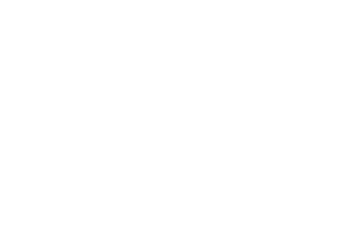

In [13]:
def plot_digit(data):
  random_digit=X.loc[0,:].to_numpy()
  diplay_digit=random_digit.reshape(28,28)
  plt.imshow(display_digit,cmap="binary")
plt.axis('off')
plt.show()
  
  

In [14]:
def plot_digits(instances,images_per_row=10,**options):
  size=28
  images_per_row=min(len(instances),images_per_row)
  images=[instance.reshape(size,size)for instance in instances]
  n_rows=(len(instances-1))//images_per_row + 1
  row_images=[]
  n_empty=n_rows * images_per_row - len(instances)
  images.append(np.zeros((size,size * n_empty)))
  for row in range(n_rows):
    rimages=images[row * images_per_row:(row+1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image=np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis("off")


more_digits_plot


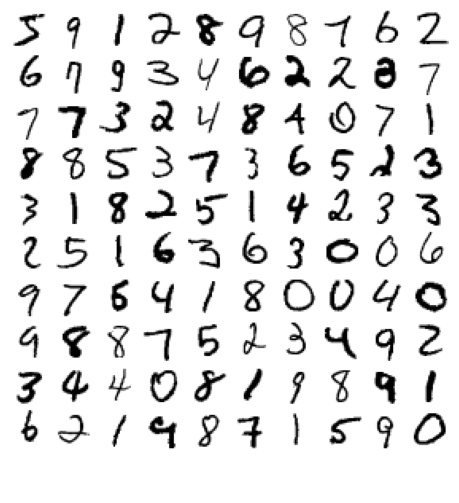

In [15]:
plt.figure(figsize=(9,9))
example_images=np.r_[X[:12000:600],X[13000:30600:600],X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
print("more_digits_plot")
plt.show()

In [16]:
X_train,X_test, y_train, y_test=X[:60000], X[60000:],y[:60000],y[60000:]
shuffle_index=np.random.permutation(60000)
X_train, y_train=X_train[shuffle_index], y_train[shuffle_index]

KeyError: ignored

Binary Classifier

In [17]:
y_train_9=(y_train == 9)
y_test_9=(y_test == 9)

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train,y_train_9)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0,fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='12',power_t=0.5,
              random_state=42, shuffle=True, tol=-np.infty, validation_fraction=0.1,
              verbose=0, warm_start=False)

SGDClassifier(max_iter=5, penalty='12', random_state=42, tol=-inf)

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

sgd_clf = SGDClassifier(random_state=42)
ranFor_clf = RandomForestClassifier(random_state=42)

In [22]:
from sklearn.model_selection import cross_val_predict
y_pred_SGD = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)
y_pred_ranFor = cross_val_predict(ranFor_clf, X_train, y_train_9, cv=3)

In [23]:
# Precision, Recall, and F1
from sklearn.metrics import precision_score, recall_score, f1_score
sgd_metrics = [precision_score(y_train_9, y_pred_SGD), recall_score(y_train_9, y_pred_SGD), f1_score(y_train_9, y_pred_SGD)]
ranFor_metrics = [precision_score(y_train_9, y_pred_ranFor), recall_score(y_train_9, y_pred_ranFor), f1_score(y_train_9, y_pred_ranFor)]


In [24]:
# Display our results in a data frame
df_metrics = pd.DataFrame({'SGD_Metrics' : sgd_metrics, 'ranFor_metrics' : ranFor_metrics})
df_metrics.index = ['Precision', 'Recall', 'F1']
df_metrics


,SGD_Metrics,ranFor_metrics
Precision,0.761002,0.981932
Recall,0.715078,0.840477
F1,0.737326,0.905715


In [25]:
# Get decision scores / prediction probabilities for each prediction
y_score_SGD = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method='decision_function')
y_score_ranFor = cross_val_predict(ranFor_clf, X_train, y_train_9, cv=3, method='predict_proba')

In [26]:
# Get predicted probabilities of positive class (the following yields same as decision score)
y_score_ranFor = y_score_ranFor[:,1]

In [27]:
# Compute precision and recall for all possible thresholds using a precision recall curve
from sklearn.metrics import precision_recall_curve
prec_SGD, recall_SGD, threshold_SGD = precision_recall_curve(y_train_9, y_score_SGD)
prec_ranFor, recall_ranFor, threshold_ranFor = precision_recall_curve(y_train_9, y_score_ranFor)


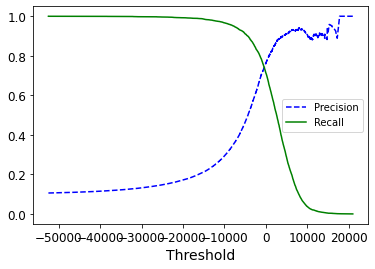

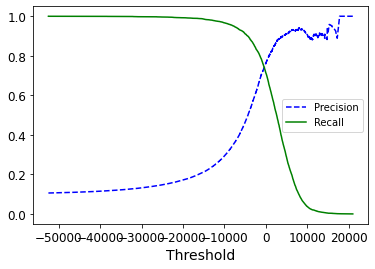

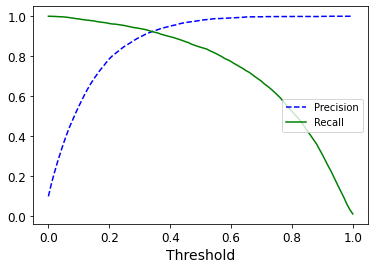

In [28]:
# Plot the precision recall vs threshold curve

# plot function
def plot_PR_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')

plot_PR_vs_threshold(prec_SGD, recall_SGD, threshold_SGD)
plt.show()

plot_PR_vs_threshold(prec_SGD, recall_SGD, threshold_SGD)
plt.show()

plot_PR_vs_threshold(prec_ranFor, recall_ranFor, threshold_ranFor)
plt.show()

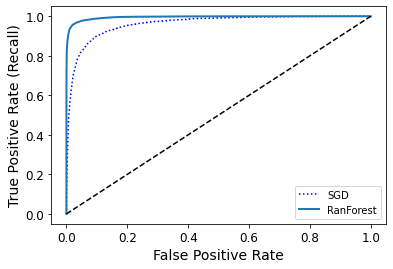

In [29]:
# Now we focus on plotting the ROC curves and determining the AUC scores

# ROC plotting function
def plot_ROC(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    
# Plot each ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr_sgd, tpr_sgd, thesholds_sgd = roc_curve(y_train_9, y_score_SGD)
fpr_ranFor, tpr_ranFor, thresholds_ranFor = roc_curve(y_train_9, y_score_ranFor)

plt.plot(fpr_sgd, tpr_sgd, "b:", label='SGD')
plot_ROC(fpr_ranFor, tpr_ranFor, label='RanForest')
plt.legend(loc='lower right')
plt.show()


In [30]:
# To confirm we check the values directly
print(f"SGD AUC-score: {round(roc_auc_score(y_train_9, y_score_SGD), 3)}")
print(f"Random Forest AUC-score: {round(roc_auc_score(y_train_9, y_score_ranFor), 3)}")


SGD AUC-score: 0.961
Random Forest AUC-score: 0.995


Multiclassification

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
ranFor_clf = RandomForestClassifier(random_state=42)
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train,y_train)
print(ovo_clf.predict(X))
print(len(ovo_clf.estimators_))

[5 0 4 ... 4 5 6]
45


In [33]:
ranFor_clf.fit(X_train, y_train)
ranFor_clf.predict(X)
print(ranFor_clf.predict_proba(X))
print(cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy"))

[[0.   0.   0.01 ... 0.   0.   0.01]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.02 ... 0.01 0.01 0.01]
 ...
 [0.   0.   0.   ... 0.   0.02 0.07]
 [0.   0.01 0.05 ... 0.   0.09 0.04]
 [0.01 0.   0.   ... 0.   0.01 0.01]]
[0.87365 0.85835 0.8689 ]


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,X_test, y_train, y_test=X[:60000], X[60000:],y[:60000],y[60000:]

X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled,y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [38]:
from sklearn.metrics import confusion_matrix
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

confusion_matrix_plot


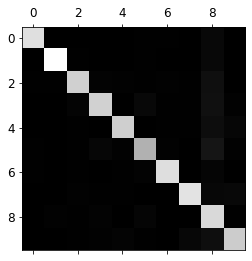

In [39]:
def plot_confusion_matrix(matrix):
  fig=plt.figure(figsize=(8,8))
  ax=fig.add_subplot(111)
  cax=ax.matshow(matrix)
plt.matshow(conf_mx,cmap=plt.cm.gray)
print("confusion_matrix_plot")  
plt.show()

confusion_matrix_errors_plot


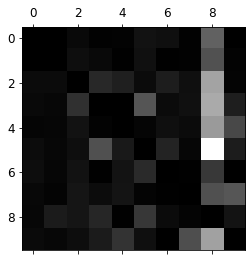

In [40]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
print("confusion_matrix_errors_plot")
plt.show()

In [45]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_pred==cl_b)]




AttributeError: ignored

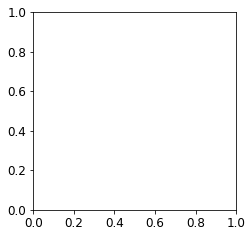

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row=5)
print("error_analysis_digits_plot")
plt.show()